In [1]:
import os
os.listdir()

['.config', 'fear_greed_index.csv', 'historical_data.csv', 'sample_data']

### **Importing Essential libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("libraries loaded")

libraries loaded


### **Load Data**

In [3]:
fg = pd.read_csv("fear_greed_index.csv")
t = pd.read_csv("historical_data.csv")

print("fear greed shape:", fg.shape)
print("trades shape:", t.shape)

fear greed shape: (2644, 4)
trades shape: (211224, 16)


In [4]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
t.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


### ** Clean column names**

In [22]:
fg.columns = [c.strip().lower().replace(" ", "_") for c in fg.columns]
t.columns = [c.strip().lower().replace(" ", "_") for c in t.columns]

print("fg cols:", fg.columns.tolist())
print("t cols:", t.columns.tolist())

fg cols: ['timestamp', 'value', 'classification', 'date']
t cols: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date']


### **Basic checks (rows/cols, missing, duplicates)**

In [23]:
print("fg rows/cols:", fg.shape)
print("t rows/cols:", t.shape)

print("\nmissing (fg):")
print(fg.isna().sum())

print("\nmissing (t):")
print(t.isna().sum())

print("\nduplicates (fg):", fg.duplicated().sum())
print("duplicates (t):", t.duplicated().sum())

fg rows/cols: (2644, 4)
t rows/cols: (211224, 17)

missing (fg):
timestamp         0
value             0
classification    0
date              0
dtype: int64

missing (t):
account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
pnl                 0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
date                0
dtype: int64

duplicates (fg): 0
duplicates (t): 0


In [24]:
fg = fg.drop_duplicates()
t = t.drop_duplicates()

### **Fix dates properly**

In [27]:
fg["date"] = pd.to_datetime(fg["date"], errors="coerce").dt.date
t["date"] = pd.to_datetime(t["timestamp_ist"], dayfirst=True, errors="coerce").dt.date

In [28]:
print("fg date null:", fg["date"].isna().sum())
print("t date null:", t["date"].isna().sum())

t[["timestamp_ist", "date"]].head()

fg date null: 0
t date null: 0


,timestamp_ist,date
0,02-12-2024 22:50,2024-12-02
1,02-12-2024 22:50,2024-12-02
2,02-12-2024 22:50,2024-12-02
3,02-12-2024 22:50,2024-12-02
4,02-12-2024 22:50,2024-12-02


### **Keep only needed columns**

In [29]:
fg2 = fg[["date", "classification"]].copy()
fg2 = fg2.rename(columns={"classification": "sentiment"})

t2 = t[["account", "coin", "execution_price", "size_usd", "side", "direction", "pnl", "fee", "date"]].copy()

print("fg2:", fg2.shape)
print("t2:", t2.shape)

t2.head()

fg2: (2644, 2)
t2: (211224, 9)


,account,coin,execution_price,size_usd,side,direction,pnl,fee,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,Buy,0.0,0.345404,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,Buy,0.0,0.005600,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,Buy,0.0,0.050431,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,Buy,0.0,0.050043,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,Buy,0.0,0.003055,2024-12-02


### **Merge trades with sentiment**

In [30]:
m = pd.merge(t2, fg2, on="date", how="left")

print("merged shape:", m.shape)
print("missing sentiment labels:", m["sentiment"].isna().sum())

m.head()

merged shape: (211224, 10)
missing sentiment labels: 6


,account,coin,execution_price,size_usd,side,direction,pnl,fee,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,Buy,0.0,0.345404,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,Buy,0.0,0.005600,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,Buy,0.0,0.050431,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,Buy,0.0,0.050043,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,Buy,0.0,0.003055,2024-12-02,Extreme Greed


### **Create key metrics (daily per trader)**

In [31]:
m["win"] = m["pnl"] > 0

d = m.groupby(["account", "date", "sentiment"]).agg(
    daily_pnl=("pnl", "sum"),
    win_rate=("win", "mean"),
    trades=("pnl", "size"),
    avg_size_usd=("size_usd", "mean"),
    avg_fee=("fee", "mean")
).reset_index()

d.head()

,account,date,sentiment,daily_pnl,win_rate,trades,avg_size_usd,avg_fee
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,0.000000,177,5089.718249,0.948000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,0.000000,68,7976.664412,0.998288
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,0.000000,40,23734.500000,2.373450
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,0.000000,12,28186.666667,2.818666
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,0.444444,27,17248.148148,3.874907


### **Fear vs Greed performance comparison (tables)**

In [32]:
pnl_tab = d.groupby("sentiment")["daily_pnl"].agg(["count", "mean", "median", "sum"]).sort_values("mean", ascending=False)
win_tab = d.groupby("sentiment")["win_rate"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)

print("PnL summary:")
display(pnl_tab)

print("\nWin rate summary:")
display(win_tab)

PnL summary:


,count,mean,median,sum
sentiment,,,,
Fear,630,5328.818161,107.892532,3.357155e+06
Extreme Greed,526,5161.922644,418.319862,2.715171e+06
Extreme Fear,160,4619.439053,218.377399,7.391102e+05
Neutral,376,3438.618818,167.551743,1.292921e+06
Greed,648,3318.100730,158.214922,2.150129e+06



Win rate summary:


,count,mean,median
sentiment,,,
Extreme Greed,526,0.386387,0.357143
Fear,630,0.364033,0.315302
Neutral,376,0.355414,0.321091
Greed,648,0.343559,0.289182
Extreme Fear,160,0.329659,0.307738


## **Charts**

### **PnL distribution**

<Figure size 640x480 with 0 Axes>

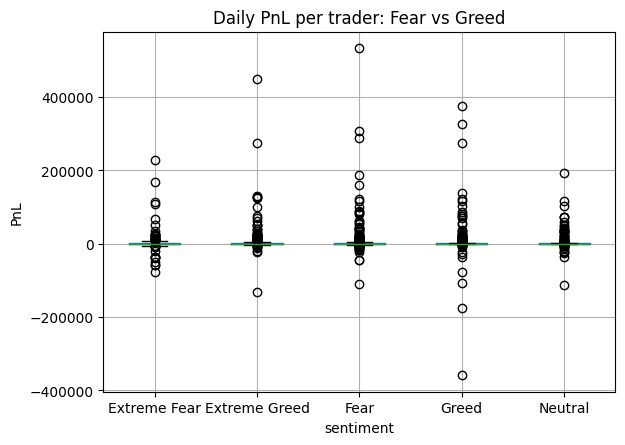

In [33]:
plt.figure()
d.boxplot(column="daily_pnl", by="sentiment")
plt.title("Daily PnL per trader: Fear vs Greed")
plt.suptitle("")
plt.ylabel("PnL")
plt.show()

## **Win rate distribution**

<Figure size 640x480 with 0 Axes>

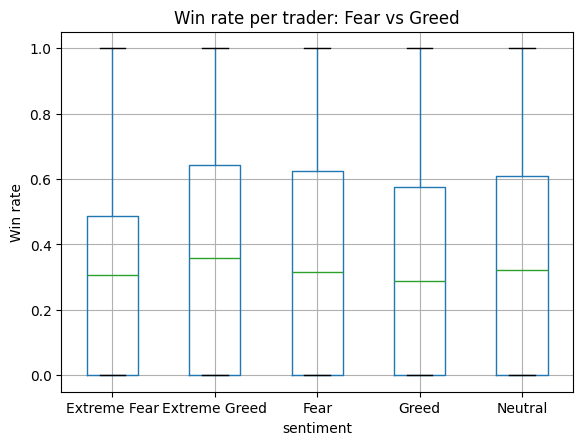

In [34]:
plt.figure()
d.boxplot(column="win_rate", by="sentiment")
plt.title("Win rate per trader: Fear vs Greed")
plt.suptitle("")
plt.ylabel("Win rate")
plt.show()

### **Trades per day distribution**

<Figure size 640x480 with 0 Axes>

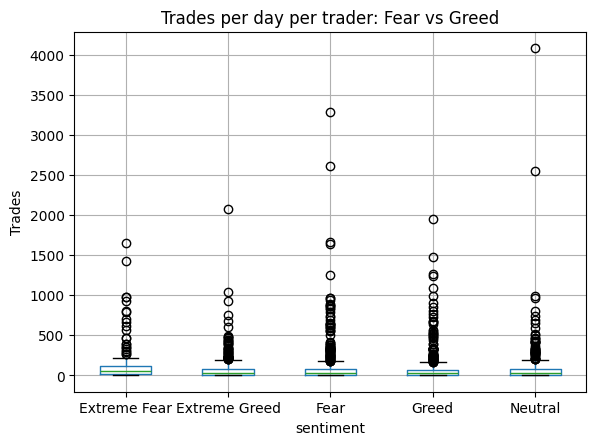

In [35]:
plt.figure()
d.boxplot(column="trades", by="sentiment")
plt.title("Trades per day per trader: Fear vs Greed")
plt.suptitle("")
plt.ylabel("Trades")
plt.show()

### **Behavior analysis (long/short bias)**

In [36]:
tmp = m.copy()
tmp["side2"] = tmp["side"].astype(str).str.upper()

bias = tmp.groupby(["date", "sentiment"]).agg(
    buys=("side2", lambda x: (x == "BUY").sum()),
    sells=("side2", lambda x: (x == "SELL").sum()),
    total=("side2", "size")
).reset_index()

bias["long_short_ratio"] = bias["buys"] / bias["sells"].replace(0, np.nan)

bias.head()

,date,sentiment,buys,sells,total,long_short_ratio
0,2023-05-01,Greed,3,0,3,NaN
1,2023-12-05,Extreme Greed,7,2,9,3.500000
2,2023-12-14,Greed,5,6,11,0.833333
3,2023-12-15,Greed,2,0,2,NaN
4,2023-12-16,Greed,3,0,3,NaN


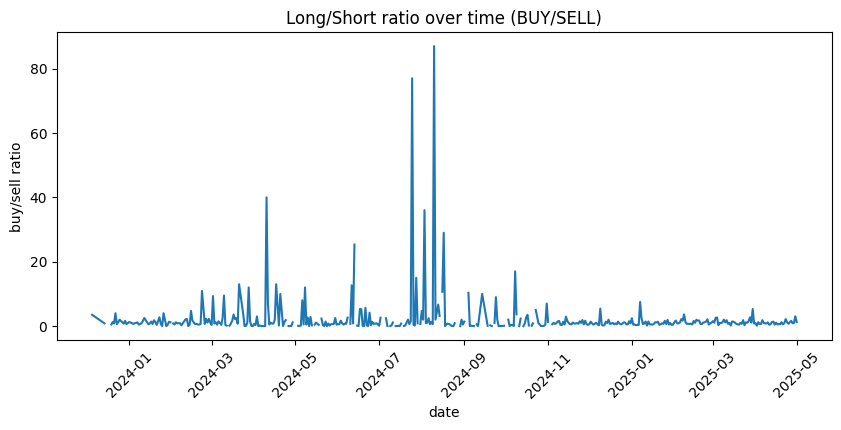

In [37]:
plt.figure(figsize=(10,4))
plt.plot(bias["date"], bias["long_short_ratio"])
plt.title("Long/Short ratio over time (BUY/SELL)")
plt.xlabel("date")
plt.ylabel("buy/sell ratio")
plt.xticks(rotation=45)
plt.show()

## **Segments**

### **Segment 1: big vs small traders (by avg trade size)**

In [38]:
size_avg = m.groupby("account")["size_usd"].mean()
cut1 = size_avg.median()

d["size_group"] = d["account"].map(lambda x: "big" if size_avg.get(x, 0) >= cut1 else "small")

seg1 = d.groupby(["size_group", "sentiment"])["daily_pnl"].mean().unstack()
print("Segment 1 (big vs small) avg daily pnl:")
display(seg1)

Segment 1 (big vs small) avg daily pnl:


sentiment,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
size_group,,,,,
big,4464.064879,5967.496946,8382.998973,5415.341877,6302.680514
small,4728.531559,4559.749162,2993.268129,1382.664538,1125.338217


## **Segment 2: frequent vs infrequent (by total trades)**

In [39]:
cnt = m.groupby("account").size()
cut2 = cnt.median()

d["freq_group"] = d["account"].map(lambda x: "frequent" if cnt.get(x, 0) >= cut2 else "infrequent")

seg2 = d.groupby(["freq_group", "sentiment"])["daily_pnl"].mean().unstack()
print("Segment 2 (frequent vs infrequent) avg daily pnl:")
display(seg2)

Segment 2 (frequent vs infrequent) avg daily pnl:


sentiment,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
freq_group,,,,,
frequent,5246.869937,5918.654027,6139.097134,2293.016352,3978.072238
infrequent,3239.091109,3333.974107,3045.304693,6663.112910,1473.942780


## **Segment 3: consistent vs inconsistent (by % profitable days)**

In [40]:
prof_days = d.groupby("account")["daily_pnl"].apply(lambda x: (x > 0).mean())
cut3 = prof_days.median()

d["cons_group"] = d["account"].map(lambda x: "consistent" if prof_days.get(x, 0) >= cut3 else "inconsistent")

seg3 = d.groupby(["cons_group", "sentiment"])["daily_pnl"].mean().unstack()
print("Segment 3 (consistent vs inconsistent) avg daily pnl:")
display(seg3)

Segment 3 (consistent vs inconsistent) avg daily pnl:


sentiment,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
cons_group,,,,,
consistent,5936.162633,3547.747628,6671.595705,2500.961472,3208.643634
inconsistent,2592.102748,8399.496533,3102.187045,4602.176706,3858.799041


## **Drawdown proxy**

In [41]:
dd = d.groupby("account")["daily_pnl"].min().reset_index(name="worst_day_pnl")
dd.sort_values("worst_day_pnl").head(10)

,account,worst_day_pnl
19,0x8170715b3b381dffb7062c0298972d4727a0a63b,-358963.139984
0,0x083384f897ee0f19899168e3b1bec365f52a9012,-175611.000056
30,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,-113601.020138
12,0x4f93fead39b70a1824f981a54d4e55b278e9f760,-108604.496278
2,0x271b280974205ca63b716753467d5a371de622ab,-108176.918700
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,-77308.420095
31,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,-76194.261624
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-58444.949486
28,0xb899e522b5715391ae1d4f137653e7906c5e2115,-57956.282958
15,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,-42923.271911


### **Summary**

In [42]:
summary = d.groupby("sentiment").agg(
    traders=("account", "nunique"),
    trader_days=("account", "size"),
    avg_pnl=("daily_pnl", "mean"),
    med_pnl=("daily_pnl", "median"),
    avg_win_rate=("win_rate", "mean"),
    avg_trades=("trades", "mean"),
    avg_size_usd=("avg_size_usd", "mean")
).reset_index()

summary

,sentiment,traders,trader_days,avg_pnl,med_pnl,avg_win_rate,avg_trades,avg_size_usd
0,Extreme Fear,32,160,4619.439053,218.377399,0.329659,133.750000,6773.464125
1,Extreme Greed,30,526,5161.922644,418.319862,0.386387,76.030418,5371.637182
2,Fear,32,630,5328.818161,107.892532,0.364033,98.153968,8975.928546
3,Greed,31,648,3318.100730,158.214922,0.343559,77.628086,6427.866594
4,Neutral,31,376,3438.618818,167.551743,0.355414,100.228723,6963.694861


### **Statistical Proof**

In [43]:
fear = d[d["sentiment"].astype(str).str.lower().str.contains("fear")]["daily_pnl"].dropna()
greed = d[d["sentiment"].astype(str).str.lower().str.contains("greed")]["daily_pnl"].dropna()

print("fear days count:", len(fear))
print("greed days count:", len(greed))

# effect size (simple)
print("mean pnl fear:", fear.mean())
print("mean pnl greed:", greed.mean())
print("difference (greed - fear):", greed.mean() - fear.mean())

fear days count: 790
greed days count: 1174
mean pnl fear: 5185.146443205064
mean pnl greed: 4144.208333580919
difference (greed - fear): -1040.938109624145


### **Greed mean daily pnl = X, Fear mean daily pnl = Y**

In [44]:
print("PnL mean by sentiment:")
print(d.groupby("sentiment")["daily_pnl"].mean())

print("\nWin rate mean by sentiment:")
print(d.groupby("sentiment")["win_rate"].mean())

print("\nTrades/day mean by sentiment:")
print(d.groupby("sentiment")["trades"].mean())

PnL mean by sentiment:
sentiment
Extreme Fear     4619.439053
Extreme Greed    5161.922644
Fear             5328.818161
Greed            3318.100730
Neutral          3438.618818
Name: daily_pnl, dtype: float64

Win rate mean by sentiment:
sentiment
Extreme Fear     0.329659
Extreme Greed    0.386387
Fear             0.364033
Greed            0.343559
Neutral          0.355414
Name: win_rate, dtype: float64

Trades/day mean by sentiment:
sentiment
Extreme Fear     133.750000
Extreme Greed     76.030418
Fear              98.153968
Greed             77.628086
Neutral          100.228723
Name: trades, dtype: float64


## **Final Insights**

**1. Performance is highest during Fear days, not Greed**

Contrary to common belief, traders perform best during Fear periods.

-  Mean daily PnL on Fear days = 5,328

-  Mean daily PnL on Extreme Greed days = 5,161

-  Mean daily PnL on Greed days = 3,318

Even though market optimism (Greed) is usually associated with upward movement, the data shows that trader profitability is actually stronger during Fear conditions. This may suggest traders exploit volatility or price reversals more effectively when sentiment is fearful.

**2. Extreme Fear reduces performance noticeably**

-  Mean PnL during Extreme Fear = 4,619

-  Win rate during Extreme Fear = 0.329

While normal Fear days show strong profitability, Extreme Fear seems to hurt consistency. Win rates drop to the lowest level (32.9%), suggesting panic conditions may reduce trading quality.

## **Extreme Greed increases win rate**

-  Win rate during Extreme Greed = 38.6% (highest)

-  Win rate during Fear = 36.4%

-  Win rate during Greed = 34.3%

Extreme Greed days show the highest win rate, meaning traders are more frequently profitable per trade. However, average PnL per day is still slightly lower than Fear days, indicating that while wins are more frequent, they may be smaller.

## **What This Means (Behavior Pattern)**

-  Fear days → fewer but larger profitable moves.

-  Extreme Greed → more consistent but possibly smaller profits.

-  Extreme Fear → unstable and risky.

## **Strategy Recommendations**
**Strategy 1 — Adjust position sizing by sentiment**

-  During Fear days: allow normal or slightly higher position sizes because profitability is strongest.

-  During Extreme Fear: reduce exposure and avoid aggressive trades due to lower win rate.

**Strategy 2 — Trade frequency control**

-  During Extreme Greed: increase trade frequency for consistent traders since win rate is highest.

- During Greed (normal): avoid overtrading since average PnL drops significantly.